In [103]:
import numpy as np
from sklearn import datasets

np.random.seed(42)

### Dataset preparation

In [104]:
iris = datasets.load_iris()

x = iris.data[:, :2] # :, -> jede Zeile; :2 -> nur die ersten beiden Spalten
y = iris.target

class_names = iris.target_names
discription = iris.DESCR

In [105]:
print(f"class names:\n{class_names}")
print(f"description:\n{discription}")

class names:
['setosa' 'versicolor' 'virginica']
description:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  

In [106]:
print(f"X-shape:\n{x.shape}")
print(f"y-shape:\n{y.shape}")

print(f"X:\n{x}")
print(f"y:\n{y}")

X-shape:
(150, 2)
y-shape:
(150,)
X:
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 

### Dataset split

In [107]:
num_samples = x.shape[0]
num_features = x.shape[1]
num_classes = len(np.unique(y))

print(f"number of samples:\n{num_samples}")
print(f"number of features:\n{num_features}")
print(f"number of classes:\n{num_classes}")

number of samples:
150
number of features:
2
number of classes:
3


In [108]:
test_size = num_samples // 3 # integer division -> //

random_indices = np.random.permutation(num_samples)

x_train = x[random_indices[:-test_size]]
y_train = y[random_indices[:-test_size]]

x_test = x[random_indices[-test_size:]]
y_test = y[random_indices[-test_size:]]

In [109]:
print(f"X-train shape:\n{x_train.shape}")
print(f"y-train shape:\n{y_train.shape}")

print(f"X-test shape:\n{x_test.shape}")
print(f"y-test shape:\n{y_test.shape}")

X-train shape:
(100, 2)
y-train shape:
(100,)
X-test shape:
(50, 2)
y-test shape:
(50,)


### KNN Model

In [110]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"accuracy: {accuracy*100.0:.4}%")

y_pred = clf.predict(x_test)
print(f"y_pred:\n{y_pred}")

accuracy: 58.0%
y_pred:
[0 0 0 2 1 0 1 1 0 1 2 1 2 2 0 2 2 2 2 1 2 1 2 1 0 1 2 1 0 1 1 2 0 1 0 2 2
 2 1 2 2 2 1 2 0 1 1 0 2 2]


### Try dirrent hyperparameters

In [111]:
n_neighbors = [n_neighbor for n_neighbor in range(1, 11)]
weight_modes = ['uniform', 'distance']

# 10 x 2 = 20 Models
for n_neighbor in n_neighbors:
    for weight_mode in weight_modes:
        clf = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight_mode)
        clf.fit(x_train, y_train)
        accracy = clf.score(x_test, y_test)
        print(f"Neighbors: {n_neighbor}\nweight mode: {weight_mode}\naccuracy: {accracy*100:.4}%\n\n")

Neighbors: 1
weight mode: uniform
accuracy: 68.0%


Neighbors: 1
weight mode: distance
accuracy: 68.0%


Neighbors: 2
weight mode: uniform
accuracy: 54.0%


Neighbors: 2
weight mode: distance
accuracy: 68.0%


Neighbors: 3
weight mode: uniform
accuracy: 58.0%


Neighbors: 3
weight mode: distance
accuracy: 56.0%


Neighbors: 4
weight mode: uniform
accuracy: 64.0%


Neighbors: 4
weight mode: distance
accuracy: 66.0%


Neighbors: 5
weight mode: uniform
accuracy: 68.0%


Neighbors: 5
weight mode: distance
accuracy: 62.0%


Neighbors: 6
weight mode: uniform
accuracy: 68.0%


Neighbors: 6
weight mode: distance
accuracy: 62.0%


Neighbors: 7
weight mode: uniform
accuracy: 72.0%


Neighbors: 7
weight mode: distance
accuracy: 66.0%


Neighbors: 8
weight mode: uniform
accuracy: 74.0%


Neighbors: 8
weight mode: distance
accuracy: 68.0%


Neighbors: 9
weight mode: uniform
accuracy: 74.0%


Neighbors: 9
weight mode: distance
accuracy: 72.0%


Neighbors: 10
weight mode: uniform
accuracy: 66.0%


Ne

In [112]:
clf = KNeighborsClassifier(n_neighbors=8, weights='uniform')
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"accuracy: {accuracy*100.0:.4}%")

y_pred = clf.predict(x_test)
print(f"y_pred:\n{y_pred}")

y_pred_proba = clf.predict_proba(x_test)
print(f"y_pred_proba:\n{y_pred_proba}")

accuracy: 74.0%
y_pred:
[0 0 0 2 1 0 1 2 0 1 2 2 2 1 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 1 0 2 2
 2 1 2 2 2 1 1 0 1 0 0 1 2]
y_pred_proba:
[[1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.125 0.875]
 [0.    0.5   0.5  ]
 [1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.375 0.625]
 [1.    0.    0.   ]
 [0.    0.5   0.5  ]
 [0.    0.125 0.875]
 [0.    0.375 0.625]
 [0.    0.375 0.625]
 [0.    0.5   0.5  ]
 [1.    0.    0.   ]
 [0.    0.375 0.625]
 [0.    0.625 0.375]
 [0.    0.375 0.625]
 [0.    0.625 0.375]
 [0.125 0.875 0.   ]
 [0.    0.625 0.375]
 [0.625 0.375 0.   ]
 [0.    0.5   0.5  ]
 [0.    0.875 0.125]
 [1.    0.    0.   ]
 [0.    0.875 0.125]
 [0.    0.125 0.875]
 [0.    0.375 0.625]
 [1.    0.    0.   ]
 [0.125 0.875 0.   ]
 [0.    0.375 0.625]
 [0.    0.25  0.75 ]
 [1.    0.    0.   ]
 [0.    0.5   0.5  ]
 [1.    0.    0.   ]
 [0.    0.375 0.625]
 [0.    0.125 0.875]
 [0.    0.125 0.875]
 [0.    0.625 0.375]
 [0.    0.375 0.625]
 [0.    0.25  0.75 

In [113]:
from typing import Any

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_background = ListedColormap(
    colors=[
        '#FFAAAA',
        '#AAFFAA',
        '#AAAAFF']
)

cmap_points = [
    'red',
    'green',
    'blue'
]

In [114]:
def make_mashgrid(
    x0: np.ndarray,
    x1: np.ndarray
) -> np.ndarray:
    step_width = 0.05
    offset = 0.1
    x0_arange = np.arange(np.min(x0) - offset, np.max(x0) + offset, step_width)
    x1_arange = np.arange(np.min(x1) - offset, np.max(x1) + offset, step_width)
    xx0, xx1 = np.meshgrid(x0_arange, x1_arange)

    return xx0, xx1

In [115]:
def plot_contours(
    ax: plt.Axes,
    clf: KNeighborsClassifier,
    xx0: np.ndarray,
    xx1: np.ndarray,
    **params: Any
):
    x_combinations = np.vstack([xx0.flatten(), xx1.flatten()]).T
    z = clf.predict(x_combinations)
    z = np.reshape(z, newshape=(xx0.shape))
    ax.contourf(xx0, xx1, z, **params)

In [126]:
def plot_decision_border(
    clf: KNeighborsClassifier,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray) -> None:

    fig, ax = plt.subplots()
    X0 = x_train[:, 0]
    X1 = x_train[:, 1]
    xx0, xx1 = make_mashgrid(X0, X1)
    plot_contours(
        ax, clf, xx0, xx1, cmap=cmap_background, alpha=0.5
    )
    for index, point in enumerate(x_train):
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_points[y_train[index]],
            s=15,
            marker="o")

    for index, point in enumerate(x_test):
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_points[y_test[index]],
            s=40,
            marker="*")
    plt.show()

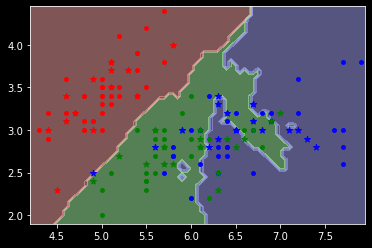

In [127]:
plot_decision_border(clf, x_train, y_train, x_test, y_test)